In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

In [2]:
IBMQ.load_account()

/tmp/ipykernel_14805/485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_14805/485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider=IBMQ.get_provider("ibm-q")

In [4]:
for backend in provider.backends():
    try:
        qubit_count=len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name()}:{backend.status().pending_jobs}& {qubit_count} qubits")

ibmq_qasm_simulator:0& simulated qubits
ibmq_lima:21& 5 qubits
ibmq_belem:26& 5 qubits
ibmq_quito:36& 5 qubits
simulator_statevector:0& simulated qubits
simulator_mps:0& simulated qubits
simulator_extended_stabilizer:1& simulated qubits
simulator_stabilizer:1& simulated qubits
ibmq_jakarta:140& 7 qubits
ibmq_manila:29& 5 qubits
ibm_lagos:92& 7 qubits
ibm_nairobi:47& 7 qubits
ibm_perth:109& 7 qubits
ibm_oslo:30& 7 qubits


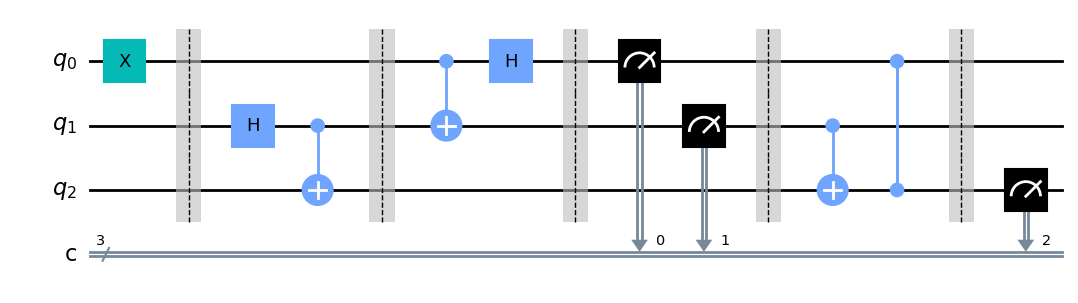

In [5]:
circuit=QuantumCircuit(3,3)
circuit.x(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2) ### To entangle
circuit.barrier()
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
#### Now Alice will measure the qubits and put in the clasical bits
circuit.measure([0,1],[0,1])
circuit.barrier()
# Now change q2 according to q0 and q1
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()
circuit.measure([2],[2])
circuit.draw(output='mpl')

In [6]:
quantum_computer=provider.get_backend('ibm_oslo')

In [7]:
import qiskit.tools.jupyter
%qiskit_job_watcher
job=execute(circuit,backend=quantum_computer,shots=1024)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (14)

In [ ]:
quantum_result=job.result()
counts=quantum_result.get_counts(circuit)
plot_histogram([counts])